# Análisis Exploratorio y Estadístico sobre Ventas de Videojuegos

## Introducción

La industria de los videojuegos es una de las más grandes del entretenimiento a nivel mundial.
Comprender cómo se distribuyen las ventas por región, género y plataforma permite identificar
tendencias de mercado y patrones de consumo.

En este proyecto se realiza un análisis exploratorio de un dataset de ventas de videojuegos,
con el objetivo de extraer insights relevantes a partir de los datos históricos disponibles.
El análisis se enfoca principalmente en:

- Ventas globales y regionales
- Géneros más exitosos
- Plataformas con mayor volumen de ventas
- Evolución temporal de las ventas

## Objetivo

El objetivo principal de este análisis es explorar el comportamiento de las ventas de
videojuegos a nivel global, identificando patrones y tendencias que permitan responder
preguntas como:

- ¿Qué regiones concentran la mayor cantidad de ventas?
- ¿Cuáles son los géneros más vendidos?
- ¿Qué plataformas dominan el mercado?
- ¿Cómo evolucionaron las ventas a lo largo del tiempo?


## Carga de datos

Se carga el dataset de ventas de videojuegos, el cual contiene información histórica
sobre títulos lanzados en distintas plataformas, incluyendo ventas por región.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("data/video_games_sales.csv")


df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


En este caso, nuestras variables son Rank, Name, Plataform, Year, Genre, Publiosher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales.

Todos los valores de ventas estan en millones.

Con df.describe() se obtienen las estadísticas descriptivas de todas las columnas numéricas del dataset (ventas por región, ventas globales y año).

Esto permite analizar:

*   Tamaño de la muestra (count)
*   Tendencias centrales, como la media y la mediana (indicada en el cuantil 50%).
*   Medidas de dispersión, como la desviación estándar.
*   Posibles valores atípicos, observando los valores mínimo (min) y máximo (max).

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.sort_values("Global_Sales", ascending=False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Observaciones iniciales

A partir de la inspección inicial del dataset, se observan algunas cuestiones relevantes:

- Existen valores faltantes en la variable `Year`
- Las ventas se expresan en millones de unidades
- Algunas plataformas y géneros concentran una gran parte del total de ventas

Estas observaciones serán tenidas en cuenta en las siguientes etapas del análisis.


## Exploratory Data Analysis (EDA)

  

En esta sección se realiza un análisis exploratorio del dataset con el objetivo de
comprender la distribución de los datos, detectar patrones, valores atípicos y
posibles inconsistencias que puedan afectar el análisis posterior.

In [ ]:
df.shape

(16598, 11)

El dataset contiene más de 16.000 registros, lo que permite un análisis representativo del mercado.

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Las variables del dataset incluyen información sobre el nombre del juego,
plataforma, año de lanzamiento, género, editor y ventas por región.

In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


A partir de la inspección de los tipos de datos, se observa que la variable `Year`
presenta valores nulos, lo cual será tenido en cuenta en la etapa de limpieza
de datos.

In [ ]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[sales_cols].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


Las estadísticas descriptivas muestran que la mayoría de los videojuegos
tienen ventas relativamente bajas, mientras que unos pocos títulos concentran
una gran parte de las ventas totales.


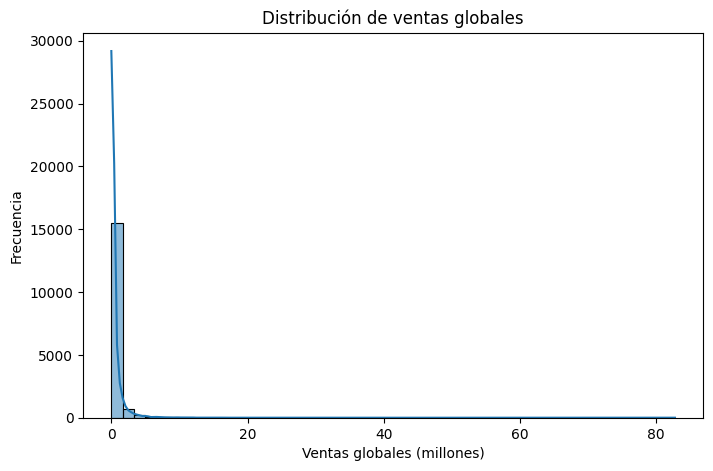

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title("Distribución de ventas globales")
plt.xlabel("Ventas globales (millones)")
plt.ylabel("Frecuencia")
plt.show()


La distribución de las ventas globales presenta una fuerte asimetría positiva,
indicando que pocos juegos alcanzan ventas muy altas mientras que la mayoría
registra ventas moderadas o bajas.


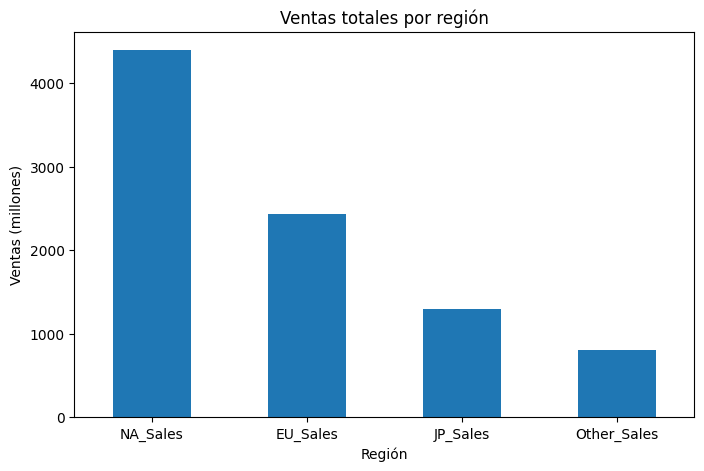

In [ ]:
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8,5))
regional_sales.plot(kind='bar')
plt.title("Ventas totales por región")
plt.xlabel("Región")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=0)
plt.show()


Se observa que Norteamérica y Europa concentran la mayor parte de las ventas
globales, mientras que Japón presenta un comportamiento diferenciado.


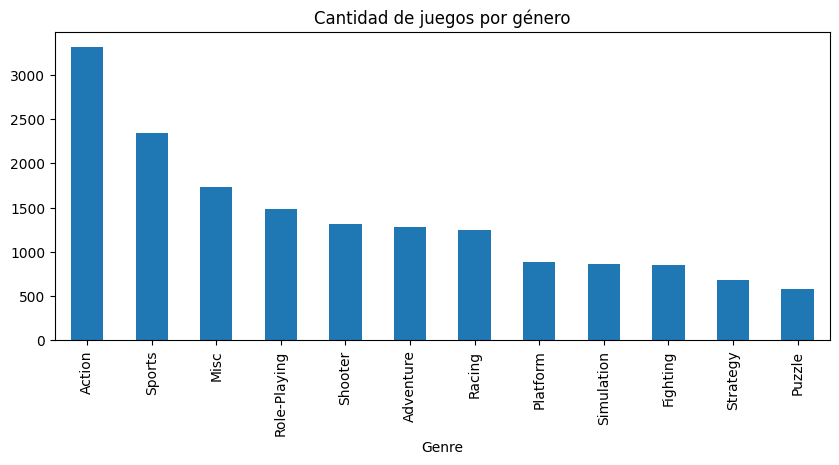

In [ ]:
df["Genre"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Cantidad de juegos por género")
plt.show()

Podemos observar que la gran mayoria de videjuegos son de Acción("Action") o Deportes("Sports").

En cambio, géneros como Estrategia("Strategy") o Puzzle aparecen mucho menos, lo que sugiere una menor representación.

## Statistical Analysis

  

Calculamos la matriz de correlación entre las variables numéricas del dataset. Esta matriz muestra la relación lineal entre cada par de variables, con valores entre -1 y 1.

In [ ]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


Observamos que la correlación más alta con las ventas globales corresponde a las ventas en Norteamérica (r = 0.94), seguida por las ventas en Europa (r = 0.90).

La variable Other_Sales presenta una correlación moderadamente alta (r = 0.75), lo cual resulta lógico considerando que agrupa a numerosos países no incluidos en las demás categorías.
Por otro lado, Japón es la región que menos contribuye a las ventas globales, mostrando una correlación más baja (r = 0.61).

También se aprecia una fuerte relación entre las ventas en NA y EU (r = 0.77), lo que indica que los juegos exitosos en Norteamérica suelen serlo también en Europa. Esto sugiere patrones de consumo y preferencias similares entre ambas regiones.

En cuanto al ranking de ventas, los juegos mejor posicionados (es decir, con valores más cercanos a 1) tienden a tener mayores ventas, lo que se refleja en la correlación negativa observada (r = –0.43). Esto confirma que una mejor posición en el ranking está asociada a un mayor volumen de ventas.

Finalmente, el año de lanzamiento muestra una correlación muy baja con las ventas globales (r ≈ –0.075), lo que indica que no existe una relación significativa entre la fecha de salida del videojuego y su desempeño comercial. Es decir, los títulos más antiguos o más nuevos no presentan, una tendencia clara de ventas.

Luego representamos la matriz mediante un heatmap, lo cual facilita la visualización de patrones.

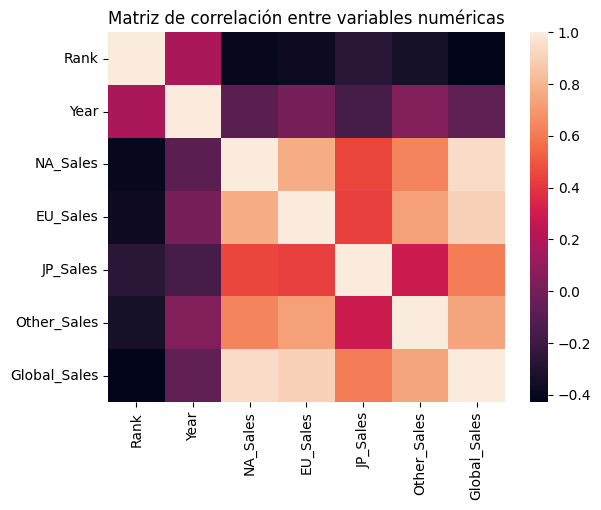

In [ ]:
sns.heatmap(df_num.corr(), annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Se identifican zonas de fuerte correlación (colores más intensos) entre las regiones occidentales de ventas, y una correlación más débil con Japón.
Esta visualización confirma los demas patrones observados en la matriz numérica.

## Bivariate Analysis

  

En esta sección se realiza un análisis bivariado del dataset.

Para ello se emplean distintos tipos de gráficos, dependiendo del tipo de variables involucradas. Cuando ambas variables son numéricas, se utilizan gráficos de dispersión para visualizar correlaciones. Cuando una variable es categórica y la otra numérica, se emplean boxplots o gráficos de barras para comparar distribuciones o promedios entre categorías.

Este conjunto de visualizaciones complementa el análisis previo y ayuda a comprender mejor cómo interactúan las variables del dataset, lo cual es fundamental para interpretar resultados y plantear hipótesis estadísticas en etapas posteriores.

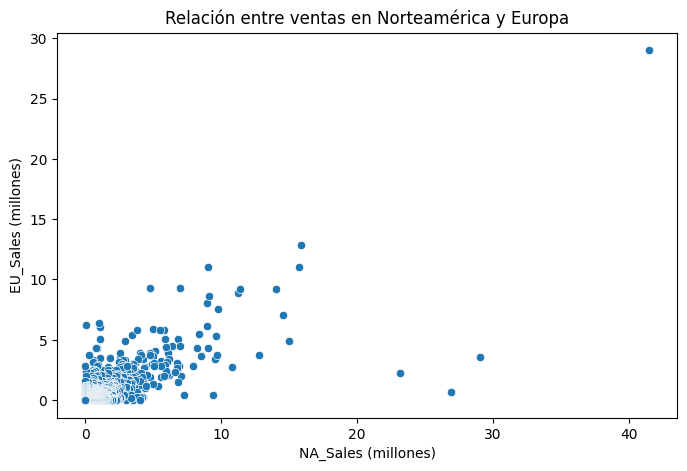

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="NA_Sales", y="EU_Sales")
plt.title("Relación entre ventas en Norteamérica y Europa")
plt.xlabel("NA_Sales (millones)")
plt.ylabel("EU_Sales (millones)")
plt.show()

A partir de este gráfico podemos observar una tendencia ascendente o relación lineal entre las ventas en Europa (EU) y en Norteamérica (NA). Esto indica que, en general, los videojuegos que se venden bien en EU también suelen tener buen rendimiento en NA.

Además, al comparar las ventas entre ambas regiones, se aprecia que la mayoría de los videojuegos vendieron menos de 5 millones de copias. Esto sugiere que la mayor parte de los títulos tienen un impacto comercial relativamente bajo, mientras que solo unos pocos alcanzan cifras de ventas destacadas.

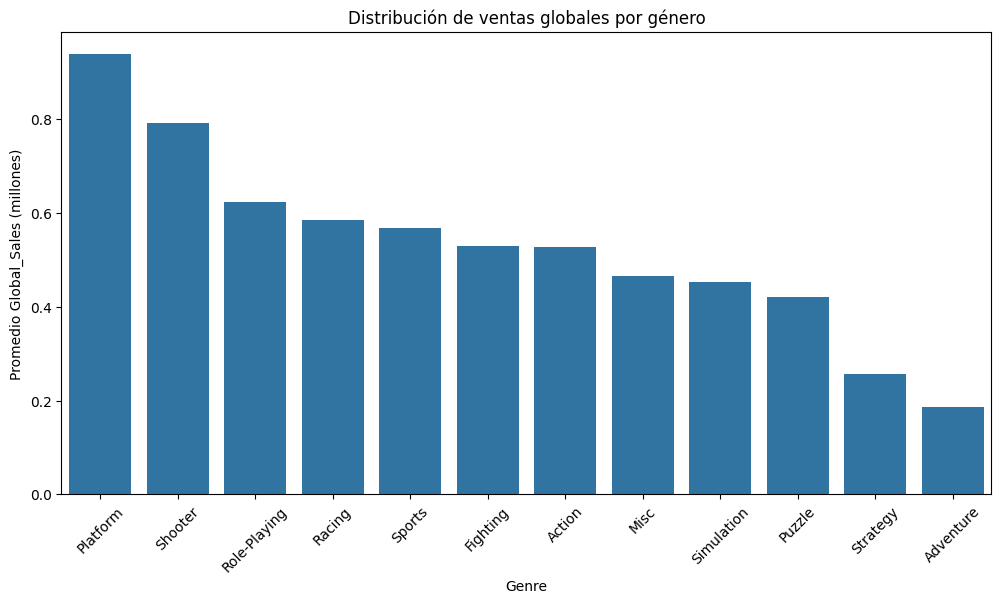

In [ ]:
plt.figure(figsize=(12,6))
sales_mean = df.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False)

sns.barplot(x=sales_mean.index, y=sales_mean.values)
plt.xticks(rotation=90)
plt.xticks(rotation=45)
plt.title("Distribución de ventas globales por género")
plt.ylabel("Promedio Global_Sales (millones)")
plt.show()

A partir de este gráfico podemos concluir que los videojuegos más vendidos (en promedio) a nivel global pertenecen al género Plataforma, seguidos por los juegos de Disparos (Shooter).

Los géneros que menos venden globalmente son Estrategia y Aventura.

El resto de los géneros presenta ventas similares, generalmente entre 0.4 y 0.6 millones de copias a nivel global.

Además, según los gráficos anteriores donde analizábamos la cantidad de juegos por género, observamos que la mayoría del mercado está compuesto por títulos de Acción (más de 3000 juegos). Sin embargo, este género no parece ser el más rentable a nivel global. Por el contrario, los videojuegos de Plataforma, con apenas unos 1000 títulos, resultan ser los que logran mayores ventas promedio.

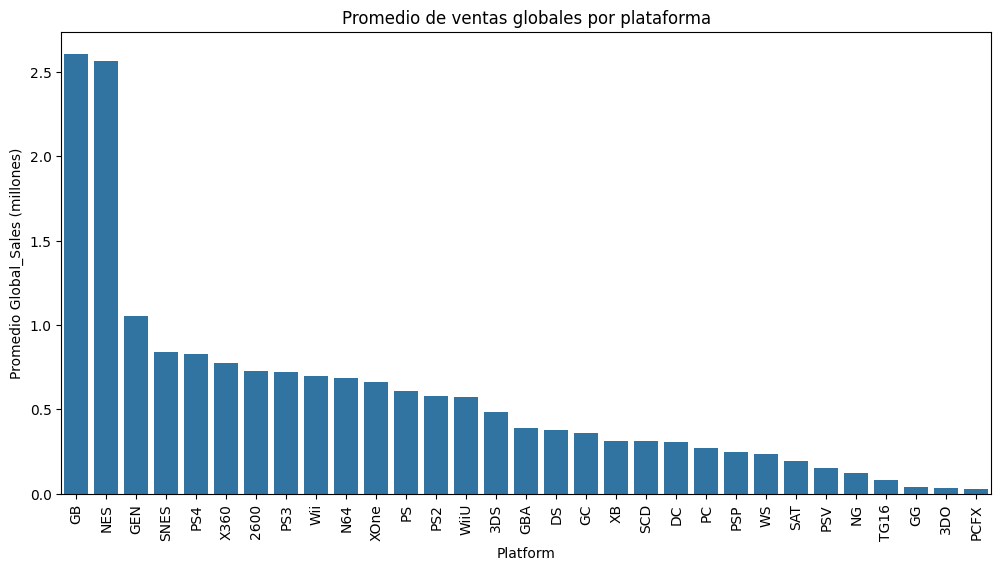

In [ ]:
plt.figure(figsize=(12,6))
sales_mean = df.groupby("Platform")["Global_Sales"].mean().sort_values(ascending=False)

sns.barplot(x=sales_mean.index, y=sales_mean.values)
plt.xticks(rotation=90)
plt.title("Promedio de ventas globales por plataforma")
plt.ylabel("Promedio Global_Sales (millones)")
plt.show()

A partir de este gráfico podemos concluir que, en promedio, las consolas con mejores ventas globales fueron la GB (Game Boy) y la NES (Nintendo Entertainment System).

A pesar de que la Wii cuenta con el videojuego más vendido (Wii Sports), el resto de sus títulos tuvieron ventas considerablemente inferiores. Por ello, su promedio general apenas alcanza los 0.8 millones de copias.

También observamos que las consolas con menores ventas globales fueron la GG, 3DO y PCFX, lo que indica que los videojuegos lanzados para estas plataformas no lograron un impacto significativo en el mercado.

## Hypothesis Testing
  

Podemos plantear las siguietnes hipotesis:

1.   Los videjuegos de genero de Plataforma(Platform) vende mas que le gnero de Puzzle.

2.   Las ventas en EU y NA, son parecidas.

Y vmaos a reoslverlas con test de hipotesis.


Para la hipotesis (1) usaremos un t-test para comparar si las ventas medias entre dos grupos son significativamente diferentes.

Este método permite evaluar si la diferencia observada entre dos medias es suficientemente grande como para no atribuirse al azar.

Se plantea una hipótesis nula (H0), que establece que las medias son iguales, y una hipótesis alternativa (H1), que indica que las medias son distintas. El resultado del test incluye un p-valor, y si este es menor a 0.05 se rechaza H0, concluyendo que las medias difieren significativamente.

Mientras que para la hipotesis (2) utilizaremos el coeficiente de correlación de Pearson, que se usa para evaluar si existe relación lineal entre dos variables numéricas.

Este método cuantifica la fuerza y dirección de la relación entre dos variables. El coeficiente toma valores entre −1 y 1, donde valores cercanos a 1 indican fuerte correlación positiva.

Se contrasta la hipótesis nula (H0), que establece que la correlación real es cero (no existe relación). Si el p-valor es menor a 0.05, se rechaza H0, concluyendo que la relación observada es estadísticamente significativa.


Para la hipoteis (1), "Los videjuegos de genero de Plataforma(Platform) vende mas que le gnero de Puzzle."

Planteamos que:

H0: La media de Global_Sales en Platform es igual a la de Puzzle.

H1: Las medias son distintas.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Cargar dataset
#df = pd.read_csv("video_games_sales.csv")

# Filtrar géneros
Platform = df[df["Genre"] == "Platform"]["Global_Sales"].dropna()
Puzzle  = df[df["Genre"] == "Puzzle"]["Global_Sales"].dropna()

# Medias
print("Media Platform:", Platform.mean())
print("Media Puzzle:", Puzzle.mean())

# Test t (Welch: equal_var=False)
t_stat, p_val = ttest_ind(Platform, Puzzle, equal_var=False)
print("t =", t_stat)
print("p-value =", p_val)


Media Platform: 0.9383408577878104
Media Puzzle: 0.4208762886597938
t = 4.776995590756395
p-value = 1.9588082782491653e-06


Como nuestro p-valor es significativamente menor a 0.05, esto indica que debemos rechazar la hipótesis nula (H0). En consecuencia, concluimos que la media de las ventas globales entre ambos géneros es significativamente diferente.

Luego, analizando la media de ventas globales para ambos géneros, observamos que el género Plataforma presenta casi el doble de ventas promedio en comparación con el género Puzzle.

Ahora vemos la hipotesis (2) "Las ventas en EU y NA, son parecidas." y la nalizmos a travesd de la correlacion de Pearson.

Planteamos que:

H0: La correlación entre NA_Sales y EU_Sales es 0 (no hay relación).

H1: La correlación es distinta de 0 (sí hay relación).

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

#df = pd.read_csv("video_games_sales.csv")

# Tomar las dos columnas
na = df["NA_Sales"].dropna()
eu = df["EU_Sales"].dropna()

# Correlación de Pearson
corr, p_value = pearsonr(na, eu)

print("Correlación (Pearson):", corr)
print("p-value:", p_value)


Correlación (Pearson): 0.7677267483702637
p-value: 0.0


En este caso, nuestro valor p da 0. Esto ocurre por redondeo: al ser un valor extremadamente pequeño, la máquina lo aproxima a 0. Por lo tanto, la probabilidad de que la correlación observada sea producto del azar es prácticamente nula.

Como p < 0.05, rechazamos la hipótesis nula (H0), por lo que concluimos que sí existe correlación entre las ventas de NA y EU.

Además, observamos un alto índice de correlación entre ambas variables, con un valor de 0.77, lo cual indica una correlación fuerte. Esto significa que, cuando un juego vende bien en Norteamérica, por lo general también vende bien en Europa.

El análisis estadístico del dataset de ventas de videojuegos permitió identificar tendencias claras en el comportamiento del mercado global. Las regiones de Norteamérica y Europa son las que más contribuyen a las ventas totales, y además presentan una correlación fuerte entre sí, lo cual sugiere patrones de consumo similares. La mayoría de los juegos presentan ventas relativamente bajas, siendo pocos los que alcanzan un éxito comercial significativo.

En cuanto a los géneros, Plataforma y Shooter muestran las mayores ventas globales promedio, mientras que Estrategia y Aventura presentan desempeños considerablemente menores. También se observó que, aunque Acción es el género con mayor cantidad de lanzamientos, no es de los más rentables en términos de ventas promedio. A nivel de consolas, la GB y la NES destacan como las de mayor rendimiento promedio, mientras que otras plataformas como GG, 3DO o PCFX tuvieron un impacto comercial reducido.

Por último, los tests de hipótesis confirmaron tanto la diferencia significativa en ventas entre géneros como la existencia de una fuerte relación entre las ventas de NA y EU. En conjunto, estos análisis permiten comprender mejor cómo se comporta el mercado de videojuegos y qué factores están más asociados al éxito comercial.

## Conclusiones



- Norteamérica y Europa lidera las ventas globales de videojuegos, además presentan una correlación fuerte entre sí, lo cual sugiere patrones de consumo similares.
- Los juegos de acción concentran la mayor parte del mercado.
- Las ventas alcanzaron su pico entre 2007 y 2010.